# Recap - SQL Advanced

Tonight, we will use a Blog SQLite database:

In [1]:
!tree

.
├── data
│   ├── blog.sqlite
│   ├── ecommerce.sqlite
│   ├── exploitable_db.sqlite
│   └── students.sqlite
├── exploit.py
├── recap-correction.ipynb
└── recap.ipynb

1 directory, 7 files


## 1. Schema ERD

❓ Open the `data/blog.sqlite` in DBeaver, explore the schema and draw it on [kitt.lewagon.com/db](https://kitt.lewagon.com/db).

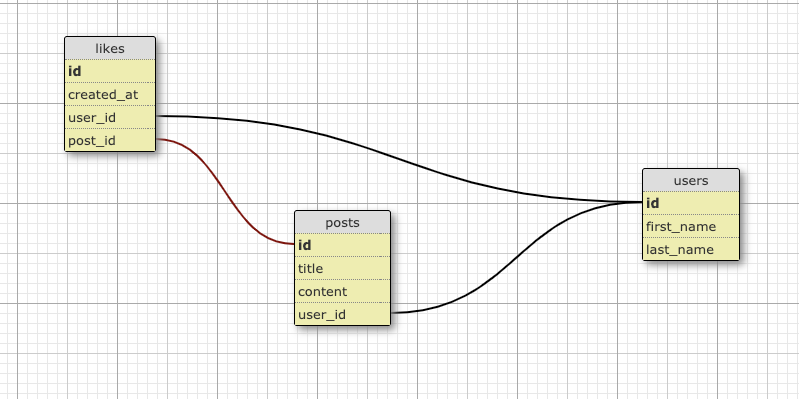

---
## 2. Most liked posts

Complete the code to get **the 3 most liked posts**:

In [3]:
import sqlite3

conn = sqlite3.connect("data/blog.sqlite")
c = conn.cursor()

# TODO: write the query
query = """
    SELECT 
        posts.title,
        COUNT(likes.id) AS likes_count
    FROM posts
    JOIN likes ON posts.id = likes.post_id
    GROUP BY posts.id
    ORDER BY likes_count DESC
    LIMIT 3
"""

# TODO: Execute the query
c.execute(query)

# TODO: Fetch and print the results
rows = c.fetchall()
rows

[('Half imagine another.', 84),
 ('Side foot leader popular.', 82),
 ('Area paper whatever mean.', 81)]

---

### Pretty Print using _pandas_

The readbility of our `print()` statements are not so good.

Next week, we will introduce [pandas](https://pandas.pydata.org/) which will largely improve the UX of our Data Exploration in Notebooks.

Execute the following cell:

In [5]:
import pandas as pd

df = pd.DataFrame(rows, columns=['Title', 'Count'])
df

Title  Count
0      Half imagine another.     84
1  Side foot leader popular.     82
2  Area paper whatever mean.     81

Then try again the previous `query`, delegating the job of fetching results + displaying them to the `execute_and_print` function and `pandas`:

In [6]:
pd.read_sql_query(query, conn)

title  likes_count
0      Half imagine another.           84
1  Side foot leader popular.           82
2  Area paper whatever mean.           81

---
## 3. Find the three users who 'liked' the most

In [7]:
pd.read_sql_query("""
    SELECT 
        u.first_name, 
        COUNT(l.id)
    FROM users u
    JOIN likes l ON u.id = l.user_id
    GROUP BY u.id
    ORDER BY 2 DESC
    LIMIT 3
""", conn)

first_name  COUNT(l.id)
0    Michael          236
1      Donna          233
2    Barbara          227

---
## 4. Find the most liked author

In [17]:
pd.read_sql_query("""
    SELECT 
        posts.user_id AS author_id,
        COUNT(likes.id) AS like_count,
        users.first_name || " " || users.last_name AS author_name
    FROM posts
    JOIN likes ON likes.post_id = posts.id
    JOIN users ON users.id = author_id
    GROUP BY author_id
    ORDER BY like_count DESC
    LIMIT 1
""", conn)

author_id  like_count   author_name
0         57         647  Teresa Moore

---
## 5. Who are the authors of the 3 most liked posts?

In [22]:
pd.read_sql_query("""
    SELECT 
        posts.title,
        posts.content,
        posts.user_id AS author_id,
        COUNT(likes.id) AS like_count,
        users.first_name || " " || users.last_name AS author_name
    FROM posts
    JOIN likes ON likes.post_id = posts.id
    JOIN users ON users.id = author_id
    GROUP BY posts.id
    ORDER BY like_count DESC
    LIMIT 3
""", conn)

title  \
0      Half imagine another.   
1  Side foot leader popular.   
2  Area paper whatever mean.   

                                             content  author_id  like_count  \
0  Nice career practice image. Modern son per sha...         72          84   
1  Relate parent run public choice allow. Establi...         63          82   
2  Space whose often computer. Yard account stuff...         64          81   

       author_name  
0    Melissa Henry  
1  Cynthia Raymond  
2   Alexander Cook

---
## 6. How many people liked at least one post?

In [26]:
pd.read_sql_query("""
    WITH at_least_one AS (
        SELECT 
            COUNT(l.user_id) AS like_count
        FROM likes l
        GROUP BY l.user_id
        HAVING like_count >= 1
    )
    SELECT COUNT(*) 
    FROM at_least_one
""", conn)

COUNT(*)
0        49

---
## 7. Compute the cumulative number of likes per day

In [34]:
pd.read_sql_query("""
   SELECT 
       likes.created_at,
       COUNT(likes.id) like_count,
       SUM(COUNT(likes.id)) OVER (
           ORDER BY likes.created_at
       ) AS cumulative_count
    FROM likes
    GROUP BY likes.created_at
    ORDER BY likes.created_at
""", conn)

created_at  like_count  cumulative_count
0    2019-01-01          24                24
1    2019-01-02          34                58
2    2019-01-03          40                98
3    2019-01-04          36               134
4    2019-01-05          27               161
..          ...         ...               ...
331  2019-12-24          35              9882
332  2019-12-25          33              9915
333  2019-12-26          32              9947
334  2019-12-27          23              9970
335  2019-12-28          30             10000

[336 rows x 3 columns]

---
## 8. (Optional) Who's the biggest fan of each author?

The biggest fan of an author is defined as the user who liked the most the author's posts.
<br><br>
<details>
    <summary>💡 Click for Hint</summary>
    You might need to use <code>WITH</code>
</details>


In [ ]:
pd.read_sql_query("""
TODO: Write the SQL query
""", conn)